# Example - Getting Flywheel Metadata using the SDK
This example notebook shows:

* Some convenience features of the Flywheel Notebook - for example the preinstalled SDK client that handles API keys for you
* How to use the SDK to get Flywheel metadata in tabular form (a pandas dataframe).
* Create a new Flywheel Analysis container at the project level to hold selected notebook charts.
* Generating a chart using seaborn and adding the output file to the Flywheel Analysis container.
* Generating an interactive chart using plotly and adding the output html file to the Flywheel Analysis container.

This notebook can be downloaded and run as-is within the Flywheel Notebook environment without any package dependencies.

It uses the MedNIST data set, which can be ingested using this tutorial notebook: [MedNIST dataset ingestion to Flywheel](https://gitlab.com/flywheel-io/scientific-solutions/tutorials/notebooks/MedNIST/-/blob/main/1_ingest.ipynb?ref_type=heads)

The dataset is kindly made available by Dr. Bradley J. Erickson M.D., Ph.D. (Department of Radiology, Mayo Clinic) under the Creative Commons CC BY-SA 4.0 license.If you use the MedNIST dataset, please acknowledge the source.



### Preconfigured flywheel_client

The `fw` variable is pre-initialized with an ephemeral api key with your user credentials, so you don't need to provide them.  Below is an example usage:

In [1]:
fw.get_current_user().id

'username@gmail.com'

### Preloaded project object

The environment is also preloaded with Flywheel project info from the Flywheel project the workspace is in.  This exists under `fw.workspace_project` and also as`fw_project`

In [2]:
project = fw_project

In [3]:
project.label

'MedNIST'

## Create the pandas data frame containing Flywheel Metadata

In [4]:
import pandas

In [5]:
view = fw.View(label='Acquisition label', columns=["subject.label", "session.label", "acquisition.label", "acquisition.info.label"])
view.error_column = None

In [6]:
view_id = fw.add_view(project.id, view)

In [7]:
df = fw.read_view_dataframe(view_id, project.id)

In [8]:
df

project.label subject.label session.label  acquisition.label   
0        MedNIST         sub_0         ses_1               4626  \
1        MedNIST         sub_1         ses_1               6852   
2        MedNIST        sub_10         ses_1               3357   
3        MedNIST        sub_11         ses_1               7265   
4        MedNIST        sub_12         ses_1               5080   
..           ...           ...           ...                ...   
95       MedNIST        sub_95         ses_1               7333   
96       MedNIST        sub_96         ses_1               4483   
97       MedNIST        sub_97         ses_1               2322   
98       MedNIST        sub_98         ses_1               9993   
99       MedNIST        sub_99         ses_1               4130   

   acquisition.info.label                project.id                subject.id   
0                 ChestCT  649e0ae6449075fb16c9fa1a  649e0ae83cc5f328e9497edf  \
1                     CXR  649e0ae6449075fb16c9fa1a  649e0ae83cc5f328e9497ee0   
2                     CXR  649e0ae6449075fb16c9fa1a  649e0ae83cc5f328e9497ee1   
3               AbdomenCT  649e0ae6449075fb16c9fa1a  649e0ae83cc5f328e9497ee2   
4                  HeadCT  649e0ae6449075fb16c9fa1a  649e0ae83cc5f328e9497ee3   
..                    ...                       ...                       ...   
95              BreastMRI  649e0ae6449075fb16c9fa1a  649e0ae83cc5f328e9497f3e   
96                   Hand  649e0ae6449075fb16c9fa1a  649e0ae83cc5f328e9497f3f   
97                    CXR  649e0ae6449075fb16c9fa1a  649e0ae83cc5f328e9497f40   
98                ChestCT  649e0ae6449075fb16c9fa1a  649e0ae83cc5f328e9497f41   
99                 HeadCT  649e0ae6449075fb16c9fa1a  649e0ae83cc5f328e9497f42   

                  session.id            acquisition.id  
0   649e0ae83cc5f328e9497f43  649e0ae83cc5f328e9497fa7  
1   649e0ae83cc5f328e9497f44  649e0ae83cc5f328e9497fa8  
2   649e0ae83cc5f328e9497f45  649e0ae83cc5f328e9497fa9  
3   649e0ae83cc5f328e9497f46  649e0ae83cc5f328e9497faa  
4   649e0ae83cc5f328e9497f47  649e0ae83cc5f328e9497fab  
..                       ...                       ...  
95  649e0ae83cc5f328e9497fa2  649e0ae83cc5f328e9498006  
96  649e0ae83cc5f328e9497fa3  649e0ae83cc5f328e9498007  
97  649e0ae83cc5f328e9497fa4  649e0ae83cc5f328e9498008  
98  649e0ae83cc5f328e9497fa5  649e0ae83cc5f328e9498009  
99  649e0ae83cc5f328e9497fa6  649e0ae83cc5f328e949800a  

[100 rows x 9 columns]

## Create a new Analysis container at the project level
We can store selected files from the Notebook here, so that users more comfortable in the Flywheel UI can view or interact with them (if html).

In [10]:
 analysis = project.add_analysis(label='EDA Results',info={"source": "Notebook"})
project = project.reload()

## Example of saving a Seaborn plot in the Flywheel Analysis container

In [11]:
import seaborn as sns

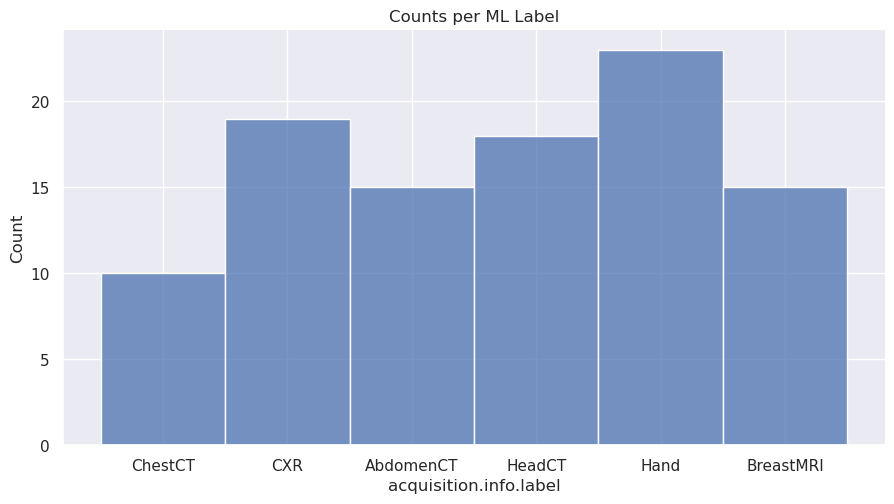

In [12]:
sns.set_theme()
f = sns.displot(data=df, x="acquisition.info.label").set(title="Counts per ML Label")
f.fig.set_figwidth(10)

Here we save the figure locally and then upload to the Analysis container.

In [13]:
 fn = f.figure.gca().get_title() + ".png"
f.savefig(fn, dpi=300)
analysis.upload_output(fn)

## Example of saving a Plotly plot in the Flywheel Analysis container

Plotly plots are saved as html files with typescript to allow for some interactivity.

In [ ]:
# Install plotly since it is not in the Flywheel Notebook kernel
!pip install plotly

In [14]:
import plotly.express as px

In [15]:
import plotly.io as pio
pio.renderers.default = 'iframe'
title = "Plotly Counts per ML Label"
fig = px.bar(df,x="acquisition.info.label",title=title)
fig.show()

Here we save the plotly output as html, and save it to the Flywheel Analysis container.

In [16]:
 fig.write_html(title + ".html")
analysis.upload_output(title + ".html")

## Viewing the Analysis Container in Flywheel UI
Click on the Analysis tab from the project view and refresh the browser to see the new Analysis container.  Then click on the container to view the contents.

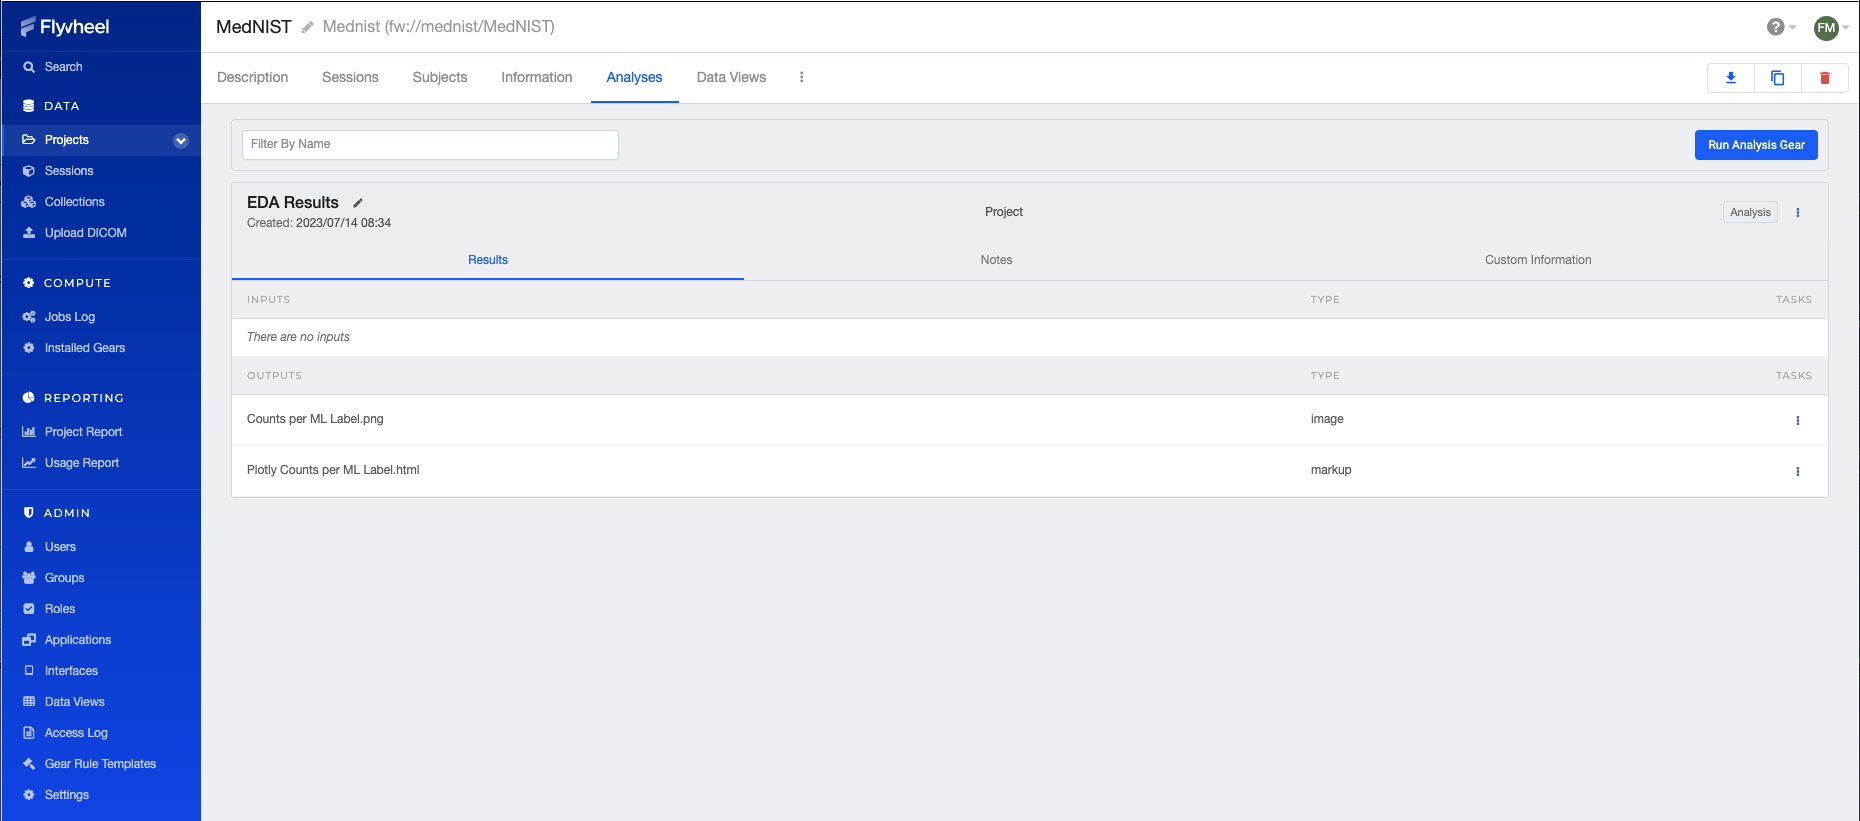


